# Simpson's paradox

It is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. In other words, Simpson’s Paradox occurs when groups of data show on a particular trend; however this trend is reversed when the groups are combined together.

This example is based on the idea of a positive correlation between hours of exercise and the probability of developing a disease, that becomes negative when you condition on being under and over a certain age. 

From a population, we sample 200 people such that 50% come from the age group under 50 and 50% come from the age group over 50. In both groups, there is a positive correlation between age and disease, and a negative correlation between exercise and disease. However, the group over 50 has more time to exercise, but also a much higher probability of developing a disease. The overal correlation between exercise and disease becomes positive. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
sns.set(style="darkgrid")


In [2]:
# 100 participants under 50
n_subj = 100

age = np.random.randint(20, 50, n_subj)
weekly_exercise_hours = np.random.randint(1, 5, n_subj) + np.random.randn(n_subj)

# beta_0 = 10, beta_ages = 0.6, beta_weh = -2.5, random subject variance = 2
prob_disease = 10 + 0.6 * age + -2.5 * weekly_exercise_hours + np.random.randn(n_subj) *  2

under_50 = pd.DataFrame({'age (y)': age, 'exercise (h)': weekly_exercise_hours, 'probability': prob_disease})
under_50.describe()

,age (y),exercise (h),probability
count,100.000000,100.000000,100.000000
mean,34.780000,2.533258,24.377252
std,9.203183,1.530426,7.099669
min,20.000000,-1.254222,5.743992
25%,27.000000,1.583009,19.899973
50%,34.500000,2.546060,23.702284
75%,43.000000,3.667590,30.005656
max,49.000000,5.937897,39.559518


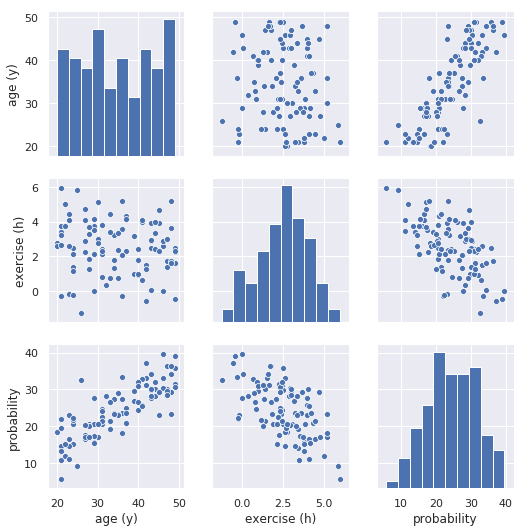

In [3]:
sns.pairplot(under_50);#,kind='reg');

In [4]:
# 100 participants over 50
n_subj = 100

age = np.random.randint(50, 85, n_subj)
weekly_exercise_hours = np.random.randint(3, 8, n_subj) + np.random.randn(n_subj) * 0.5

# beta_0 = 42, beta_age = 0.32, beta_weh = -3.2, random subject variance = 1
prob_disease = 42 + 0.32 * age + -3.2 * weekly_exercise_hours + np.random.randn(n_subj)

over_50 = pd.DataFrame({'age (y)': age, 'exercise (h)': weekly_exercise_hours, 'probability': prob_disease})
over_50.describe()

,age (y),exercise (h),probability
count,100.000000,100.000000,100.000000
mean,66.360000,4.830317,47.829014
std,10.205485,1.574884,6.152813
min,50.000000,2.044833,32.184133
25%,57.750000,3.587617,43.943725
50%,66.500000,4.570244,47.720970
75%,75.250000,6.121360,52.790542
max,84.000000,8.190439,58.547974


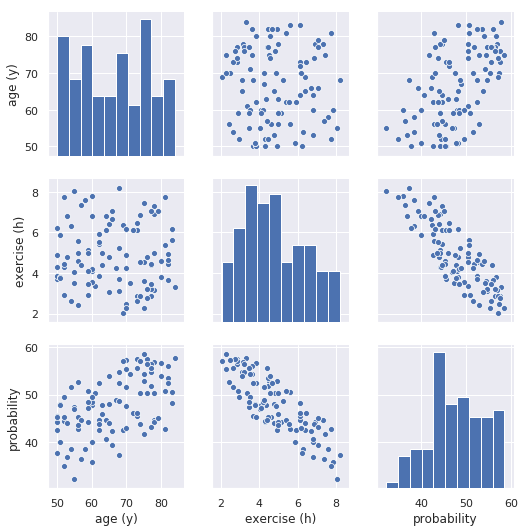

In [5]:
sns.pairplot(over_50);#,kind='reg');

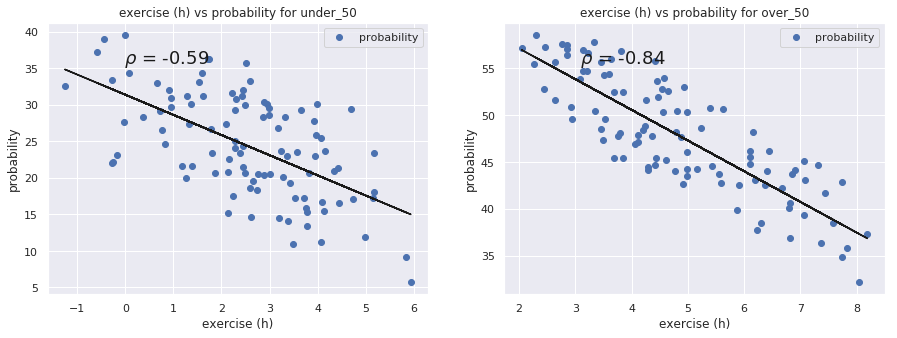

In [6]:
def lin_fit_ls(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(A, y, rcond=None)[0]

def plot_xy(df,age_group = 'under_50', x='exercise (h)',ax=None):
    y='probability'
    
    #lin reg
    _x = df[x].values
    _y = df[y].values
    m, b = lin_fit_ls(_x,_y)


    df.plot(x=x,y = 'probability',style='o',ax=ax);
    ax.plot(_x, m * _x + b, '-', color = 'k');
    plt.title('{} vs {} for {}'.format(x,y,age_group))
    
    corr_coef = np.corrcoef(_x, _y)[0][1]
    ax = plt.gca()
    plt.ylabel('probability'); 
    plt.text(0.2, 0.85, r'$\rho$ = ' + '{}'.format(round(corr_coef, 2)), fontsize = 18, color = 'k', 
             transform=ax.transAxes)
    
plt.figure(figsize = (15, 5))
ax = plt.subplot(1, 2, 1)

plot_xy(under_50,ax=ax)

ax = plt.subplot(1, 2, 2)

plot_xy(over_50,age_group='over_50',ax=ax)

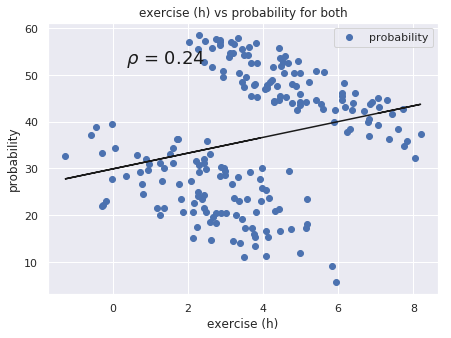

In [7]:
plt.figure(figsize = (7, 5))
combined = pd.concat([under_50, over_50], axis = 0)
ax = plt.subplot(1, 1, 1)
plot_xy(combined, age_group = 'both' ,ax=ax)

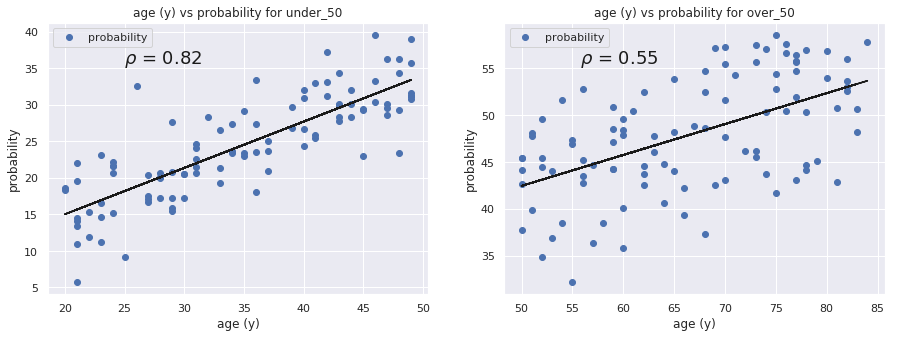

In [8]:
plt.figure(figsize = (15, 5))
ax = plt.subplot(1, 2, 1)
plot_xy(under_50, age_group='under_50',x='age (y)', ax=ax)
ax = plt.subplot(1, 2, 2)
plot_xy(over_50, age_group='over_50',x='age (y)', ax=ax)

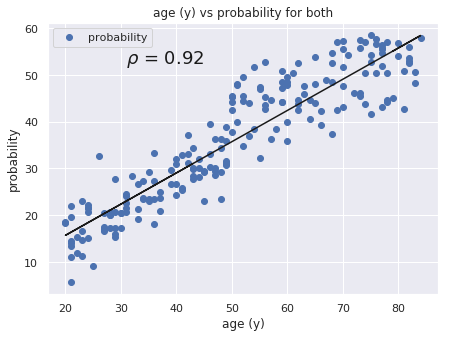

In [9]:
plt.figure(figsize = (7, 5))
ax = plt.subplot(1, 1, 1)
plot_xy(combined, age_group = 'both',x='age (y)', ax=ax)